# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import time
import os

In [3]:
results_path          = '../../LargeFilesResults/Model'
posteriors_shprior    = pd.read_csv(os.path.join(results_path, 'betas_sharedprior.csv'))
# posteriors_noprior    = pd.read_csv(os.path.join(results_path, 'betas_rm_sharedprior.csv'))
posteriors_rstan_sum  = pd.read_csv(os.path.join(results_path, 'betas_rstan_sum.csv'))
posteriors_rstan_full = pd.read_csv(os.path.join(results_path, 'betas_rstan_full2.csv'))

In [4]:
pshp = posteriors_shprior.describe(percentiles=[0.025, 0.5, 0.975])
pshp.drop(['count'])

,beta00,beta01,beta02,beta03,beta04,beta10,beta11,beta12,beta13,beta14,...,beta30,beta31,beta32,beta33,beta34,beta40,beta41,beta42,beta43,beta44
mean,-0.412162,-0.138410,-0.109862,-0.219832,-0.208547,-0.035861,-0.027572,-0.052408,-0.065771,-0.045554,...,0.217018,0.169986,-0.038126,0.048500,-0.046133,0.009067,-0.100744,0.116087,-0.084445,0.161381
std,0.276370,0.144468,0.227558,0.256686,0.198438,0.291106,0.285193,0.289781,0.287528,0.293125,...,0.195918,0.154268,0.219797,0.252176,0.171441,0.131738,0.106203,0.196122,0.229013,0.169814
min,-1.793769,-0.796755,-1.580983,-1.742120,-1.645892,-1.831731,-1.754284,-1.843131,-1.985902,-2.644458,...,-0.358897,-0.329362,-1.762077,-1.415672,-1.444731,-0.550849,-0.752626,-0.759920,-1.654769,-0.325055
2.5%,-1.020376,-0.442008,-0.629574,-0.812475,-0.656453,-0.616358,-0.612422,-0.678201,-0.685687,-0.672147,...,-0.094107,-0.079718,-0.513475,-0.429868,-0.430256,-0.244087,-0.334751,-0.198114,-0.586769,-0.090274
50%,-0.384132,-0.128788,-0.077983,-0.177657,-0.178873,-0.039013,-0.029696,-0.041249,-0.050616,-0.038286,...,0.200427,0.157235,-0.030543,0.022441,-0.031395,0.001234,-0.090353,0.087845,-0.066548,0.137708
97.5%,0.004909,0.136525,0.297897,0.187121,0.100837,0.580595,0.582101,0.529050,0.515697,0.563765,...,0.642239,0.504847,0.405051,0.613146,0.261148,0.288769,0.082824,0.565953,0.360221,0.554878
max,0.232644,0.484358,0.901957,0.896160,0.500038,2.291229,2.095473,1.684487,1.915465,1.874627,...,1.159916,0.963921,1.355366,1.518991,0.562005,0.632731,0.276829,1.638689,1.078607,1.797386


In [5]:
prstan = posteriors_rstan_sum.set_index('Unnamed: 0')

In [36]:
prstan.columns.values.size

25

In [12]:
residues_mean = []
# residues_std  = []
residues_0025 = []
residues_0975 = []
for i in range(prstan.loc['50%'].values.size):
    residues_mean.append(prstan.loc['50%'].values[i] - pshp.loc['50%'].values[i])
#     residues_std.append(prstan.loc['sd'].values[i] - pshp.loc['std'].values[i])
    residues_0025.append(prstan.loc['2.5%'].values[i] - pshp.loc['2.5%'].values[i])
    residues_0975.append(prstan.loc['97.5%'].values[i] - pshp.loc['97.5%'].values[i])
residues_mean = np.array(residues_mean)
# residues_std  = np.array(residues_std)
residues_0025 = np.array(residues_0025)
residues_0975 = np.array(residues_0975)

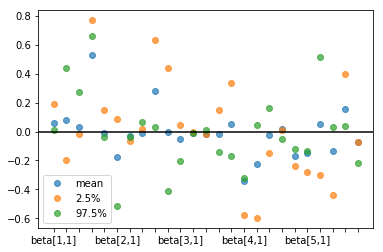

In [13]:
newxlabel = ['beta[1,1]', '', '', '', '', 'beta[2,1]', '', '', '', '', 'beta[3,1]', '', '', '', '', 'beta[4,1]', 
             '', '', '', '', 'beta[5,1]']
plt.plot(prstan.columns, residues_mean, 'o', label='mean', alpha=0.7)
# plt.plot(prstan.columns, residues_std, 'o', label='std', alpha=0.7)
plt.plot(prstan.columns, residues_0025, 'o', label='2.5%', alpha=0.7)
plt.plot(prstan.columns, residues_0975, 'o', label='97.5%', alpha=0.7)
plt.axhline(y=0, c='black')
plt.gca().set_xticklabels(newxlabel)
plt.legend(loc='best')
plt.savefig('../../LargeFilesResults/Model/divergences.png')
plt.show()

### Rafa's class: 

In [14]:
cols = pshp.columns.tolist()

In [15]:
new_header = [['beta44']]
for i in range(len(cols)):
    if i==0:
        continue
    else:
        h = i+1
        new_header.append(cols[-h: -i])
new_header = np.squeeze(np.array(new_header))

In [16]:
pshp_new = pshp[new_header]

In [17]:
residues_mean = []
# residues_std  = []
residues_0025 = []
residues_0975 = []
for i in range(prstan.loc['50%'].values.size):
    residues_mean.append(prstan.loc['50%'].values[i] - pshp_new.loc['50%'].values[i])
#     residues_std.append(prstan.loc['sd'].values[i] - pshp_new.loc['std'].values[i])
    residues_0025.append(prstan.loc['2.5%'].values[i] - pshp_new.loc['2.5%'].values[i])
    residues_0975.append(prstan.loc['97.5%'].values[i] - pshp_new.loc['97.5%'].values[i])
residues_mean = np.array(residues_mean)
# residues_std  = np.array(residues_std)
residues_0025 = np.array(residues_0025)
residues_0975 = np.array(residues_0975)

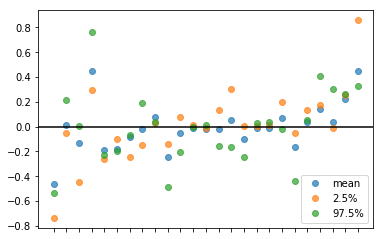

In [18]:
newxlabel = ['beta[1,1]', '', '', '', '', 'beta[2,1]', '', '', '', '', 'beta[3,1]', '', '', '', '', 'beta[4,1]', 
             '', '', '', '', 'beta[5,1]']
newxlabel = ['']
plt.plot(prstan.columns, residues_mean, 'o', label='mean', alpha=0.7)
# plt.plot(prstan.columns, residues_std, 'o', label='std', alpha=0.7)
plt.plot(prstan.columns, residues_0025, 'o', label='2.5%', alpha=0.7)
plt.plot(prstan.columns, residues_0975, 'o', label='97.5%', alpha=0.7)
plt.axhline(y=0, c='black')
plt.gca().set_xticklabels(newxlabel)
plt.legend(loc='best')
plt.savefig('../../LargeFilesResults/Model/divergences_teste.png')
plt.show()

# Comparing the distributions

In [19]:
dimensions = posteriors_shprior.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

In [20]:
posteriors_shprior.values.shape

(15000, 25)

In [21]:
posteriors_rstan_full.values.shape

(6000, 25)

In [22]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']
figsize      = (20, 20)
alpha_sh     = 0.4
alpha_nosh   = 0.6
alpha_rstan  = 0.5

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


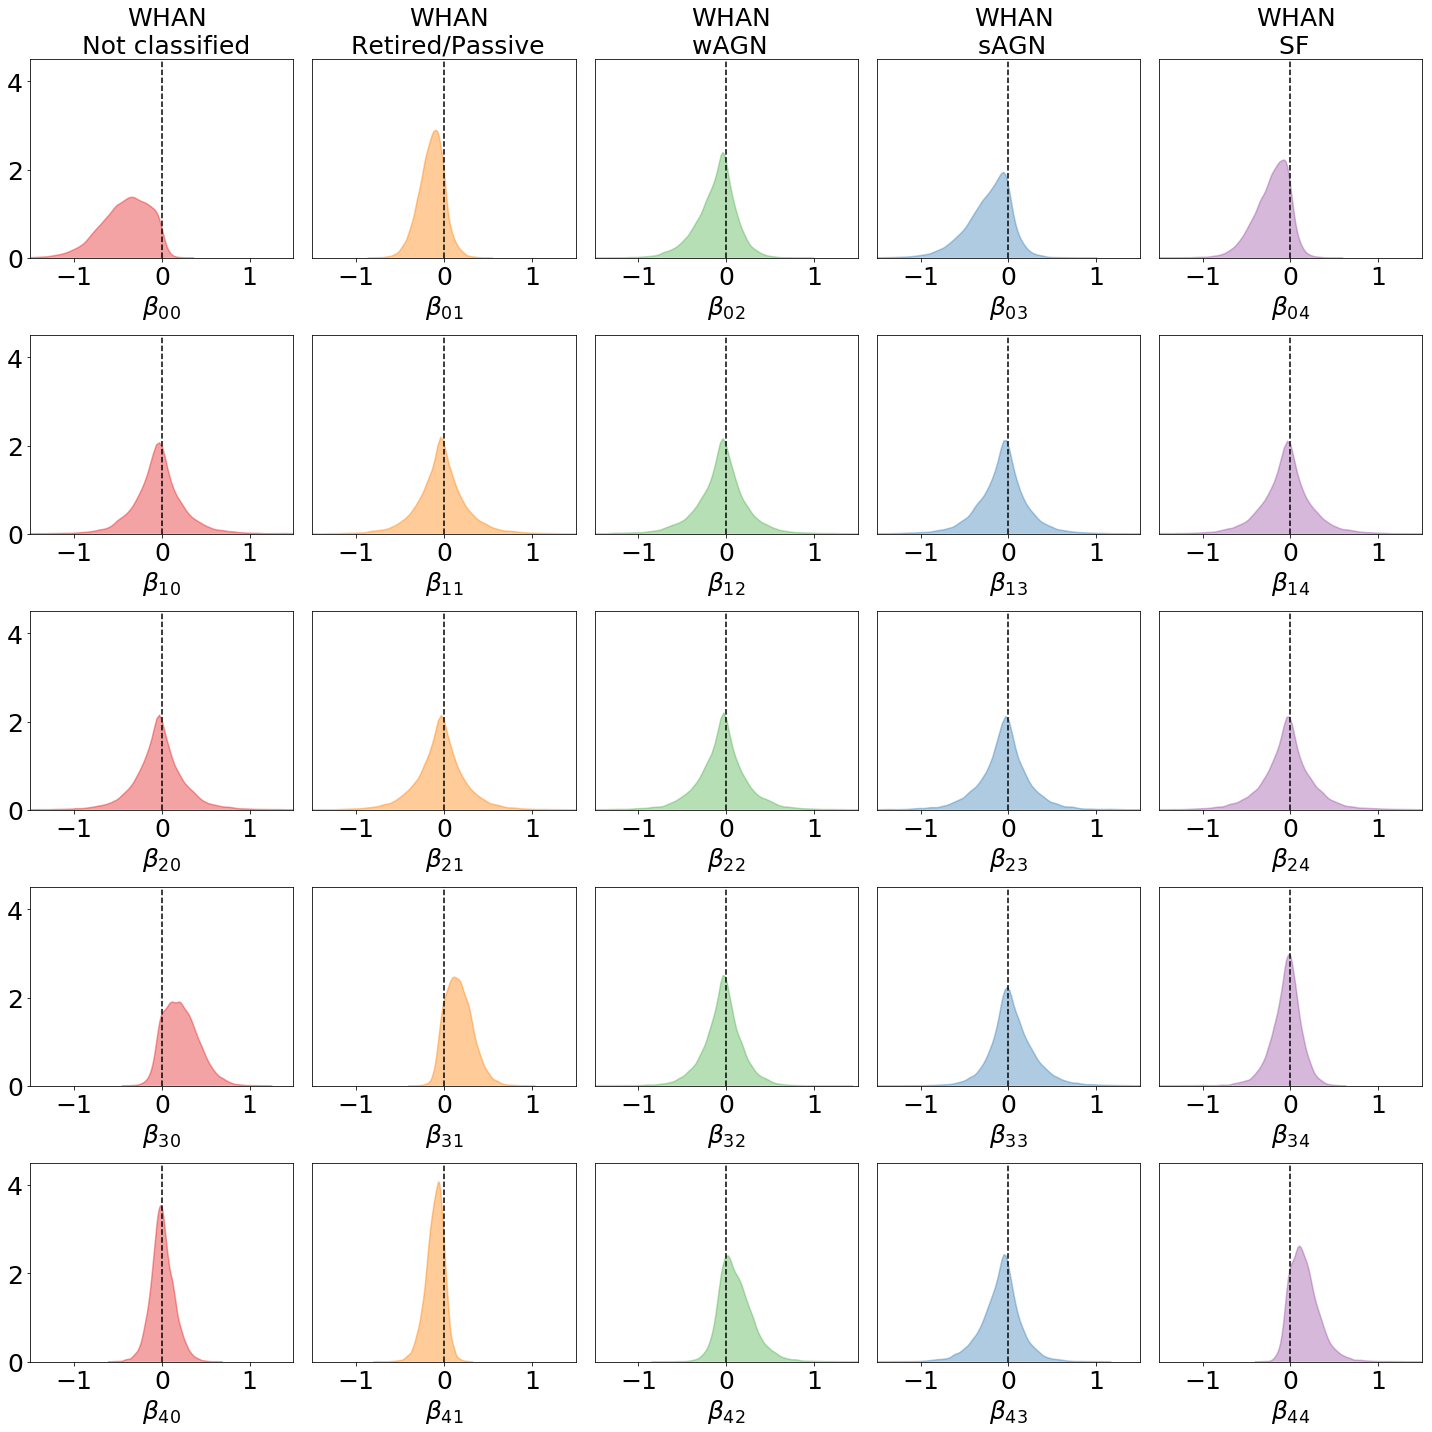

In [23]:
plt.subplots(figsize=figsize)
position = 0
for i in range(rows):
    for j in range(columns):
        position+=1
        plot = plt.subplot(rows, columns, position)
        posterior_temp = posteriors_shprior.columns.values.reshape(rows, columns)[i,j]
#         posterior_temp_rstan = posteriors_rstan_full.columns.values.reshape(rows, columns)[i,j]
        sns.kdeplot(posteriors_shprior["%s" % posterior_temp].values, shade=True, alpha=alpha_sh, color=palette[j])
#         sns.kdeplot(posteriors_rstan_full["%s"] % )
        plt.axvline(x=0, linestyle="--", color='black')
        plt.tick_params('both', labelsize='25')
        plt.xlabel(r"$\beta_{%d%d}$" % (i,j), fontsize=25)
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])
        if (i==0):
            plt.title("$\,$ WHAN \n %s" % whan_classes[j], fontsize=25)
            if (j!=0): 
                plot.yaxis.set_visible(False)
            else: 
                plot.yaxis.set_visible(True)
        elif(i>=0)*(j==0): 
            plot.yaxis.set_visible(True)
        else: 
            plot.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(results_path, "25betas_shprior.png"))
plt.savefig(os.path.join(results_path, "25betas_shprior.pdf"))
plt.show()

In [24]:
dimensions_rstan = posteriors_rstan_full.columns.values.reshape(5,5)
rows_rstan       = dimensions_rstan[:,0].size
columns_rstan    = dimensions_rstan[0,:].size

In [25]:
alpha_rstan  = 0.5

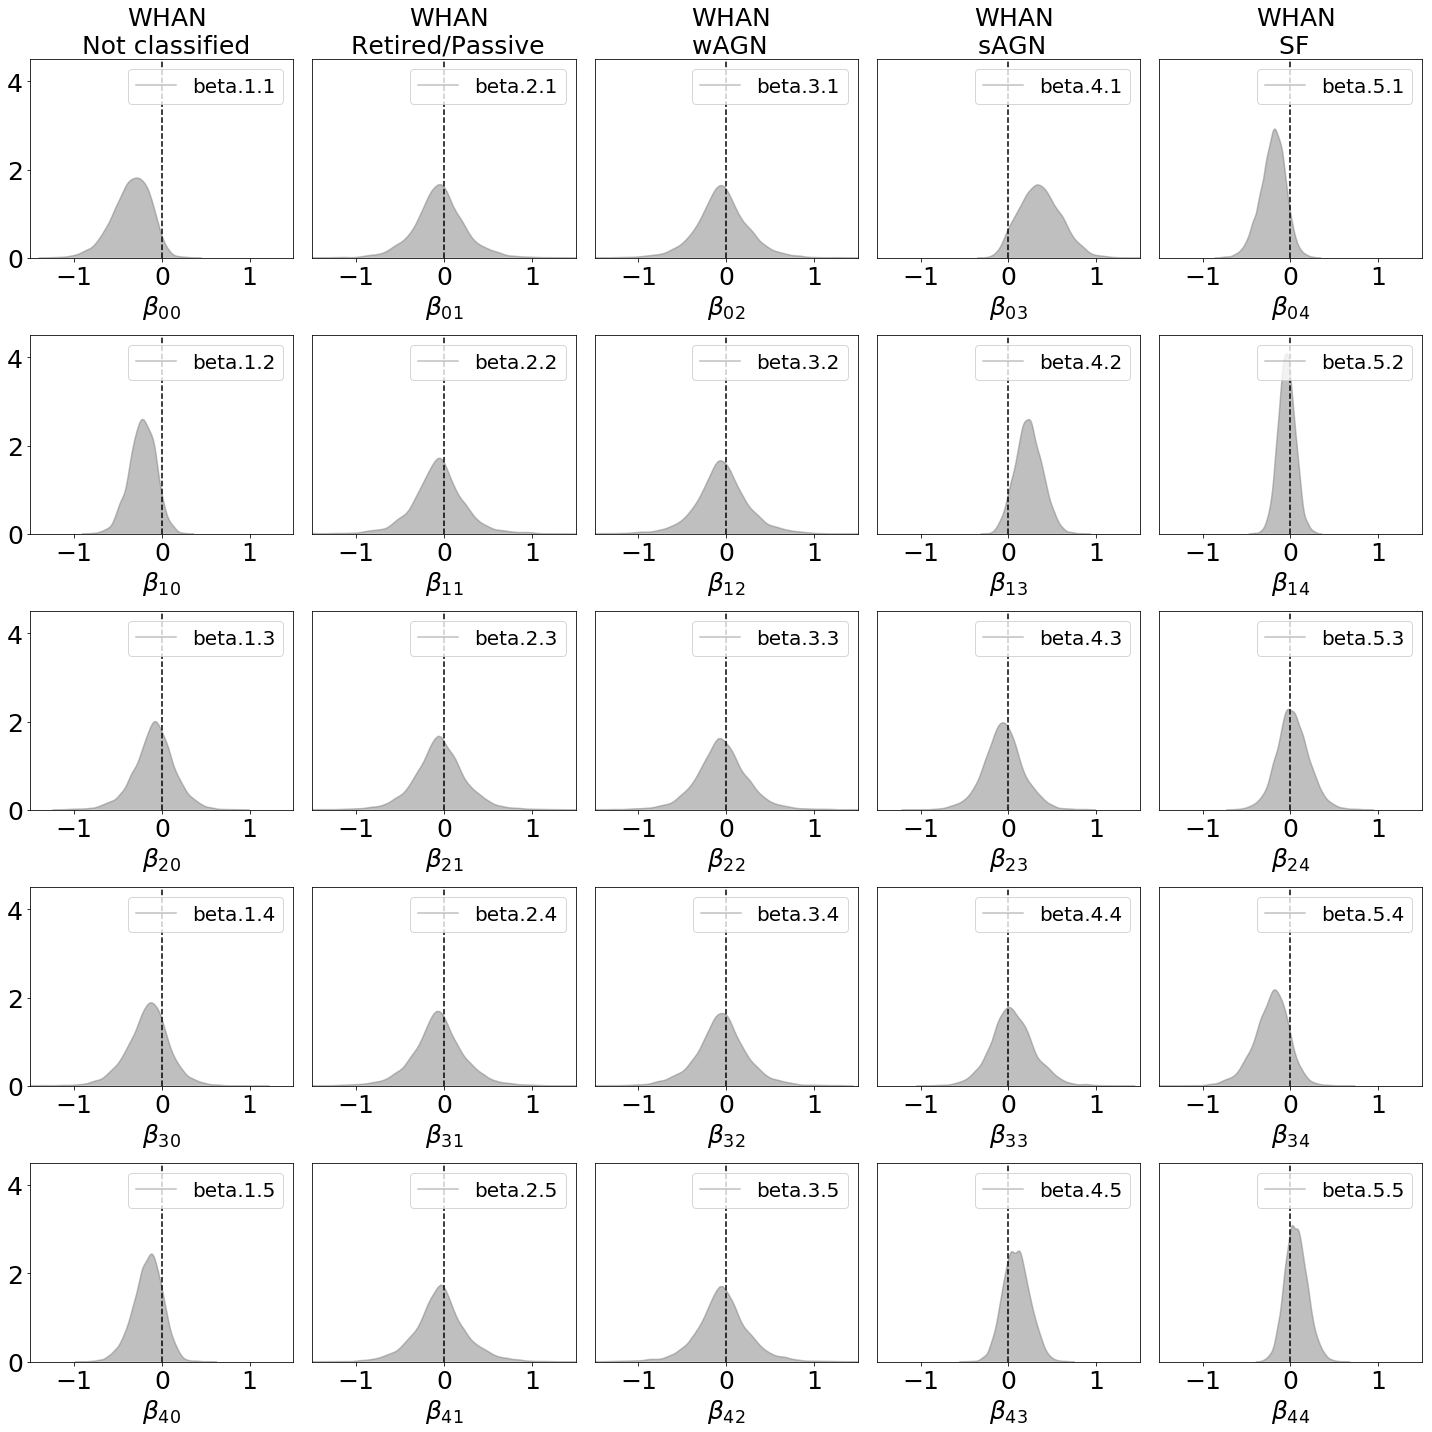

In [40]:
plt.subplots(figsize=figsize)
position = 0
for i in range(rows_rstan):
    for j in range(columns_rstan):
        position+=1
        plot = plt.subplot(rows_rstan, columns_rstan, position)
        posterior_temp = posteriors_rstan_full.columns.values.reshape(rows_rstan, columns_rstan)[i,j]
        sns.kdeplot(posteriors_rstan_full["%s" % posterior_temp].values, shade=True, alpha=alpha_rstan, 
                    color='gray', label='%s' % str(prstan.columns.values[position-1]))
        plt.axvline(x=0, linestyle="--", color='black')
        plt.tick_params('both', labelsize='25')
        plt.xlabel(r"$\beta_{%d%d}$" % (i,j), fontsize=25)
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])
        plt.legend(loc='upper right', fontsize=20)
        if (i==0):
            plt.title("$\,$ WHAN \n %s" % whan_classes[j], fontsize=25)
            if (j!=0): 
                plot.yaxis.set_visible(False)
            else: 
                plot.yaxis.set_visible(True)
        elif(i>=0)*(j==0): 
            plot.yaxis.set_visible(True)
        else: 
            plot.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(results_path, "25betas_rstan.png"))
plt.savefig(os.path.join(results_path, "25betas_rstan.pdf"))
plt.show()

In [27]:
posteriors_rstan_full

,beta.1.1,beta.2.1,beta.3.1,beta.4.1,beta.5.1,beta.1.2,beta.2.2,beta.3.2,beta.4.2,beta.5.2,...,beta.1.4,beta.2.4,beta.3.4,beta.4.4,beta.5.4,beta.1.5,beta.2.5,beta.3.5,beta.4.5,beta.5.5
0,-0.116102,0.040895,-0.041051,0.113283,0.005970,-0.110470,0.002840,0.218857,0.045506,-0.103067,...,-0.126064,-0.081014,-0.021408,0.007689,-0.168315,-0.239194,-0.110983,-0.356808,-0.020324,-0.054085
1,-0.869649,-0.119275,0.835161,0.868575,-0.148558,-0.296161,0.171281,0.387103,0.244143,-0.124643,...,0.225855,0.042022,-0.437002,0.811149,0.063671,-0.444051,0.337950,0.208053,0.165876,0.155311
2,-0.382128,0.177165,-0.256722,0.500158,-0.055653,-0.420679,0.209901,0.411171,0.216411,0.106559,...,-0.488912,-0.440323,-0.455846,-0.352530,-0.132662,-0.140054,0.292624,0.439410,-0.058329,0.048779
3,-0.254726,-0.228221,-0.121789,0.046246,-0.186699,-0.107113,-0.014213,-0.145859,0.055215,-0.034025,...,-0.076921,-0.070468,-0.163898,-0.125260,-0.127505,-0.047209,0.023955,0.041203,-0.103358,-0.019470
4,-0.489762,0.327428,0.113836,0.047506,0.025058,-0.247907,-0.004534,0.031918,0.265119,0.011237,...,0.119543,0.265135,0.086742,0.185296,-0.265744,-0.380895,-0.188259,-0.057172,0.085288,0.298109
5,-0.336176,0.053113,-0.276509,0.534892,-0.363001,0.077729,0.088422,-0.188477,0.374398,-0.052475,...,-0.349745,-0.490251,0.257630,-0.076952,-0.099185,-0.254885,0.363428,0.512157,0.178184,0.142435
6,-0.399593,-0.186009,-0.359934,0.371639,-0.156506,-0.272432,0.075038,-0.404186,0.271233,-0.045769,...,-0.255927,-0.332257,-0.067518,0.105879,-0.135420,-0.527080,-0.152001,-0.393809,0.081248,0.230825
7,-0.429739,0.023961,0.004194,0.731534,-0.089007,-0.308855,0.409891,0.722000,0.393293,-0.118444,...,0.483671,-0.599254,0.315481,0.541072,-0.282869,-0.522245,0.545099,0.105191,0.361570,0.153883
8,-0.189060,-0.068822,0.107728,0.036797,-0.264314,-0.048187,-0.041153,-0.115733,0.116782,-0.115448,...,-0.006471,0.045382,-0.058984,0.006962,-0.178727,-0.120938,-0.052599,0.105751,0.008497,0.009210
9,-0.748917,0.280418,0.431731,0.237662,0.054897,-0.237316,0.056765,-0.002927,0.399524,-0.146496,...,-0.812251,-0.228773,-0.633803,-0.185850,-0.344253,-0.041948,-0.473176,-0.076169,-0.079918,0.151849
